In [1]:
sun = pd.read_csv("234\\sonne.txt", sep="\t", header=None, decimal=",")
glas = pd.read_csv("234\\sonne_glas.txt", sep="\t", header=None, decimal=",", skiprows=[*list(range(17))])
A = pd.DataFrame([sun.iloc[:,0], 1-glas.iloc[:,1]/sun.iloc[:,1]]).transpose()

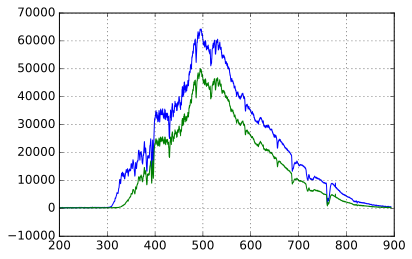

In [28]:
figure()
plot(sun.iloc[:,0],sun.iloc[:,1])
plot(glas.iloc[:,0],glas.iloc[:,1])
xlim((200,900))
grid()
show()

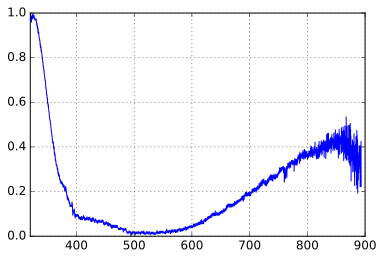

In [3]:
A_norm = (A.loc[A[0] > 320,1] - A.loc[A[0] > 320,1].min())/(A.loc[A[0] > 320,1].max() - A.loc[A[0] > 320,1].min())
figure()
plot(A.loc[A[0] > 320,0],A_norm)
xlim((320,900))
ylim((0,1))
grid()
show()

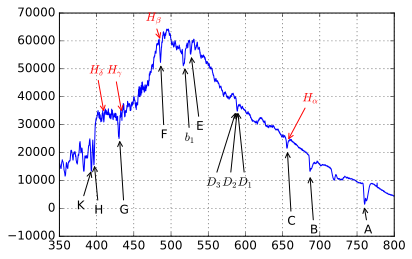

In [19]:
figure()
plot(sun.iloc[:,0], sun.iloc[:,1])
xlim((350,800))
grid()
annotate('A', xy=(759.4, 1100), xycoords='data',
              xytext=(759.4,-9000), textcoords='data',
              arrowprops=dict(arrowstyle="->"))
annotate('B', xy=(686.7, 12000), xycoords='data',
              xytext=(686.7,-9000), textcoords='data',
              arrowprops=dict(arrowstyle="->"))
annotate('C', xy=(656.3, 21000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('$D_1$', xy=(589.6, 35000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('$D_2$', xy=(589.0, 35000), xycoords='data',
              xytext=(-15,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('$D_3$', xy=(587.6, 35000), xycoords='data',
              xytext=(-30,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('E', xy=(527.0, 55000), xycoords='data',
              xytext=(5,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('$b_1$', xy=(518.4, 51000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('F', xy=(486.1, 52000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('G', xy=(430.8, 25000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('H', xy=(396.8, 16000), xycoords='data',
              xytext=(0,-50), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('K', xy=(393.4, 14000), xycoords='data',
              xytext=(-15,-40), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))

annotate(r'$H_{{\alpha}}$', xy=(656.3, 24000), xycoords='data',
              xytext=(15,40), textcoords='offset points', color='red',
              arrowprops=dict(arrowstyle="->",color='red'))
annotate(r'$H_{{\beta}}$', xy=(486.1, 60000), xycoords='data',
              xytext=(-15,20), textcoords='offset points', color='red',
              arrowprops=dict(arrowstyle="->",color='red'))
annotate(r'$H_{{\gamma}}$', xy=(434.0, 34000), xycoords='data',
              xytext=(-15,40), textcoords='offset points', color='red',
              arrowprops=dict(arrowstyle="->",color='red'))
annotate(r'$H_{{\delta}}$', xy=(410.1, 34000), xycoords='data',
              xytext=(-15,40), textcoords='offset points', color='red',
              arrowprops=dict(arrowstyle="->",color='red'))

show()

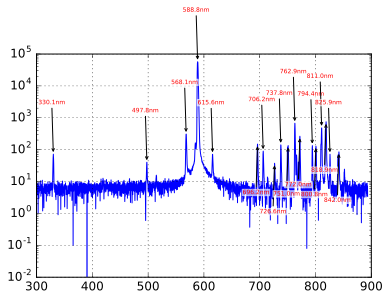

In [5]:
na_hi_raw = pd.read_csv("234\\Na_D.txt", sep="\t", header=None, decimal=",", skiprows=17)
na_hi = na_hi_raw.loc[na_hi_raw[0] > 300]
na_hi[1] = na_hi[1] + abs(na_hi[1].min())

from detect_peaks import detect_peaks
pind = detect_peaks(na_hi[1], mph=30, mpd=30)
pind = delete(pind, [3,5])

bbox = {'pad': 0.3, 'color':'white', 'alpha':0.6}
figure()
# scatter(na_hi.iloc[pind,0], na_hi.iloc[pind,1])
plot(na_hi.iloc[:,0], na_hi.iloc[:,1], 'b-')
yscale('log')
xlim((300,900))
for i in range(5):
    annotate("{0:.1f}nm".format(na_hi.iloc[pind[i],0]), xy=(na_hi.iloc[pind[i],0],na_hi.iloc[pind[i],1]),
             xycoords='data', color='red', fontsize=6, xytext=(-15, 50), bbox=bbox,
             textcoords='offset points',arrowprops=dict(arrowstyle="->"))
for i in range(5,len(pind)):
    annotate("{0:.1f}nm".format(na_hi.iloc[pind[i],0]), xy=(na_hi.iloc[pind[i],0],na_hi.iloc[pind[i],1]),
             xycoords='data', color='red', fontsize=6, xytext=(-15, 50*(-1)**i), bbox=bbox,
             textcoords='offset points',arrowprops=dict(arrowstyle="->"))
grid()
show()
# display(pd.DataFrame(na_hi.iloc[pind,0].values, index=range(18), columns=['Wellenlänge $[nm]$']))

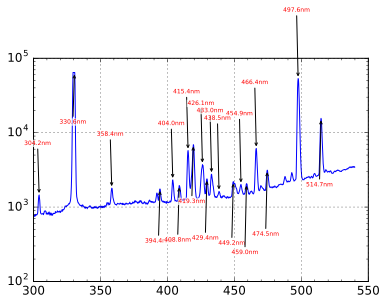

In [6]:
na_li_raw1 = pd.read_csv("234\\Na_kleineIntensität.txt", sep="\t", header=None, decimal=",", skiprows=17)
na_li1_ = na_li_raw1.loc[na_li_raw1[0] >= 300]
na_li1 = na_li1_.loc[na_li1_[0] <= 540]
na_li1[1] = na_li1[1] + abs(na_li1[1].min())

pind = detect_peaks(na_li1.loc[na_li1[0]<452,1], mph=1400, mpd=10)
pind = delete(pind,[3,12,13])

mask = na_li1[0].map(lambda x: x in arange(452,460,0.01, dtype=float).round(2))


pind = append(pind, detect_peaks(na_li1.loc[na_li1[0]>=452,1],
                                 mph=3100, mpd=30)+na_li1.index.get_loc(na_li1.loc[na_li1[0]>=452,1].index.min()))
pind = append(pind, detect_peaks(na_li1[mask][1], mph=1800, mpd=10)+na_li1.index.get_loc(na_li1[mask][0].index.min()))
mask2= na_li1[0].map(lambda x: x in arange(435,445,0.01, dtype=float).round(2))
pind = append(pind, detect_peaks(na_li1[mask2][1], mph=1450, mpd=10)+na_li1.index.get_loc(na_li1[mask2][0].index.min()))
pind = delete(pind,[16,17])


figure()
# scatter(na_li1.iloc[pind,0], na_li1.iloc[pind,1])
plot(na_li1[0], na_li1[1], 'b-')
yscale('log')
for i in range(len(pind)):
    annotate("{0:.1f}nm".format(na_li1.iloc[pind[i],0]), xy=(na_li1.iloc[pind[i],0],na_li1.iloc[pind[i],1]),
             xycoords='data', color='red', fontsize=6, xytext=(-15, 50*(-1)**i+1.2*i*(-1)**i), bbox=bbox,
             textcoords='offset points',arrowprops=dict(arrowstyle="->"))
grid()
minorticks_on()
show()

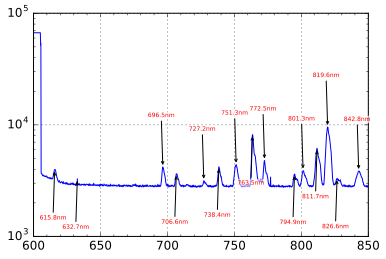

In [7]:
na_li_raw2 = pd.read_csv("234\\Na_kleineIntensität600850.txt", sep="\t", header=None, decimal=",", skiprows=17)
na_li2_ = na_li_raw2.loc[na_li_raw2[0] >= 600]
na_li2 = na_li2_.loc[na_li2_[0] <= 850]
na_li2[1] = na_li2[1] + abs(na_li2[1].min())

pind = detect_peaks(na_li2[1], mph=3000, mpd=30)
pind = append(pind, detect_peaks(na_li2[1].loc[na_li2[0] < 650], mph=3200, mpd=30))
pind = delete(pind,[0,2,3,4,18,19])

figure()
# scatter(na_li2.iloc[pind,0], na_li2.iloc[pind,1])
plot(na_li2[0], na_li2[1], 'b-')
yscale('log')
for i in range(len(pind)):
    annotate("{0:.1f}nm".format(na_li2.iloc[pind[i],0]), xy=(na_li2.iloc[pind[i],0],na_li2.iloc[pind[i],1]),
             xycoords='data', color='red', fontsize=6, xytext=(-15, 50*(-1)**(i+1)), bbox=bbox,
             textcoords='offset points',arrowprops=dict(arrowstyle="->"))
grid()
minorticks_on()
show()

<IPython.core.display.Latex object>

,$\lambda_{{theoretisch}} \ [nm]$,$\Delta \lambda_{{theoretisch}}$,$\lambda_{{gefunden}} \ [nm]$,$\Delta \lambda_{{gefunden}}$
m,,,,
3,819.600000,0,819.6,1
4,570.273835,0,NaN,1
5,499.887954,0,496.6,1
6,468.478565,0,466.4,1
7,451.377570,0,449.2,1
8,440.931023,0,NaN,1
9,434.043942,0,433.0,1
10,429.248180,0,429.4,1
11,425.767518,0,426.1,1


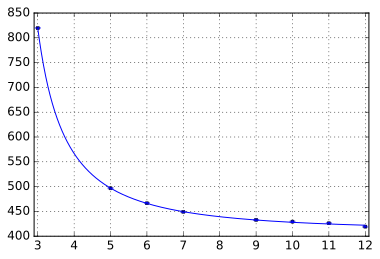

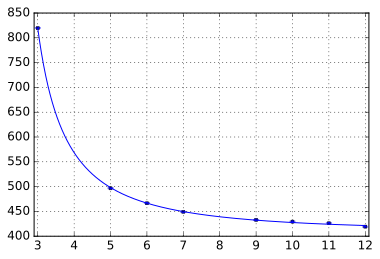

In [36]:
m = arange(3,13)
l3 = 819.6
E3p = -13.605/9 - 1.2398e+3/l3
dE3p = 0 #1.2398e+3/(l3**2) * dl3
valerr("E_{{3p}}", E3p, dE3p, 3,"eV")
l_t = 1.2398e+3/(-13.605/(m**2) - E3p)
dl_t = l_t * dE3p/(-13.605/(m**2) - E3p)
na_lines = pd.DataFrame.from_items([("m",m),
                                    ("$\lambda_{{theoretisch}} \ [nm]$",l_t),
                                    ("$\Delta \lambda_{{theoretisch}}$",dl_t),
                                    ("$\lambda_{{gefunden}} \ [nm]$",
                                     [819.6, None, 496.6, 466.4, 449.2, None, 433.0, 429.4, 426.1, 419.3]),
                                    ("$\Delta \lambda_{{gefunden}}$",
                                     ones(10))
                                   ]).set_index("m")
display(na_lines)

lm = lambda m, Er, Ep, D: 1.2398e+3/(Er/((m-D)**2) - Ep)
lm_ = lambda m, Ep, D: 1.2398e+3/(-13.605/((m-D)**2) - Ep)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(lm, na_lines.dropna().index.values, na_lines.dropna().iloc[:,2],
                       sigma=na_lines.dropna().iloc[:,3], p0=[-13.6, -3.02, 0.8])

figure()
errorbar(na_lines.dropna().index.values, na_lines.dropna().iloc[:,2],
         yerr=na_lines.dropna().iloc[:,3].values, fmt='bs')
plot(arange(3,12,0.01), lm(arange(3,12,0.01), *popt))
xlim((2.9,12.1))
xticks(arange(3,13))
grid()
show()

popt, pcov = curve_fit(lm_, na_lines.dropna().index.values, na_lines.dropna().iloc[:,2],
                       sigma=na_lines.dropna().iloc[:,3], p0=[-3.02, 0.8])

figure()
errorbar(na_lines.dropna().index.values, na_lines.dropna().iloc[:,2],
         yerr=na_lines.dropna().iloc[:,3].values, fmt='bs')
plot(arange(3,12,0.01), lm_(arange(3,12,0.01), *popt))
xlim((2.9,12.1))
xticks(arange(3,13))
grid()
show()

1.3713750056514273

,$\lambda_{{theoretisch}} \ [nm]$,$\lambda_{{gefunden}} \ [nm]$
m,,
4,1174.747315,NaN
5,622.675741,615.8
6,518.891247,514.7
7,477.778877,474.5
8,456.695410,454.9
9,444.280957,438.5


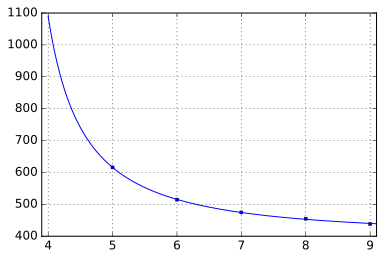

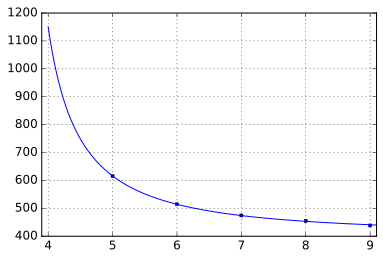

In [27]:
m = arange(4, 10)
E3s = E3p - 1.2398e+3/589
Ds = -sqrt(-13.605/E3s) + 3
display(Ds)
l_t = 1.2398e+3/(-13.605/((m-Ds)**2) - E3p)
na_lines = pd.DataFrame.from_items([("m",m),
                                    ("$\lambda_{{theoretisch}} \ [nm]$",l_t),
                                    ("$\lambda_{{gefunden}} \ [nm]$",
                                     [None, 615.8, 514.7, 474.5, 454.9,438.5])
                                   ]).set_index("m")
display(na_lines)

popt, pcov = curve_fit(lm, na_lines.dropna().index.values, na_lines.dropna().iloc[:,1], p0=[-13.6, -3.02, 1.3])

figure()
errorbar(na_lines.dropna().index.values, na_lines.dropna().iloc[:,1], fmt='bs')
plot(arange(4,10,0.01), lm(arange(4,10,0.01), *popt))
xlim((3.9,9.1))
xticks(arange(4,10))
grid()
show()

popt, pcov = curve_fit(lm_, na_lines.dropna().index.values, na_lines.dropna().iloc[:,1], p0=[-3.02, 0.8])

figure()
errorbar(na_lines.dropna().index.values, na_lines.dropna().iloc[:,1], fmt='bs')
plot(arange(4,10,0.01), lm_(arange(4,10,0.01), *popt))
xlim((3.9,9.1))
xticks(arange(4,10))
grid()
show()

In [10]:
m = array([4,5])
Dp = -sqrt(-13.605/E3p)+3
display(Dp)
l_t = 1.2398e+3/(-13.605/((m-Dp)**2) - E3s)
na_lines = pd.DataFrame.from_items([("m",m),
                                    ("$\lambda_{{theoretisch}} \ [nm]$",l_t),
                                    ("$\lambda_{{gefunden}} \ [nm]$",
                                     [330.6, None])
                                   ]).set_index("m")
display(na_lines)

0.87903826624600079

,$\lambda_{{theoretisch}} \ [nm]$,$\lambda_{{gefunden}} \ [nm]$
m,,
4,332.161667,330.6
5,286.450175,NaN
